## Heirarichal Clustring Implementation

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [8]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
train_test_split()

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
df_scaled = scaler.fit_transform(df)

In [14]:
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
## Reduce the dimension of data from 4 to 2 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [17]:
pca

PCA(n_components=2)

In [21]:
pca_scaled = pca.fit_transform(df)

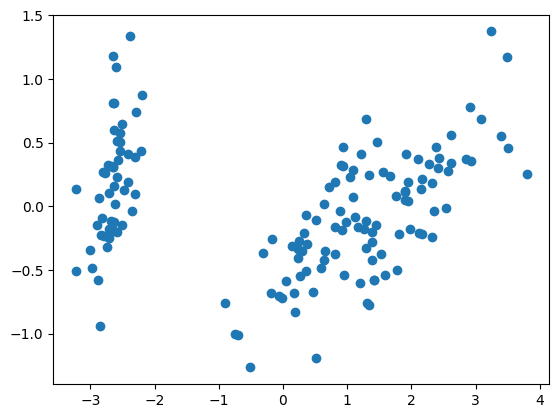

In [23]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

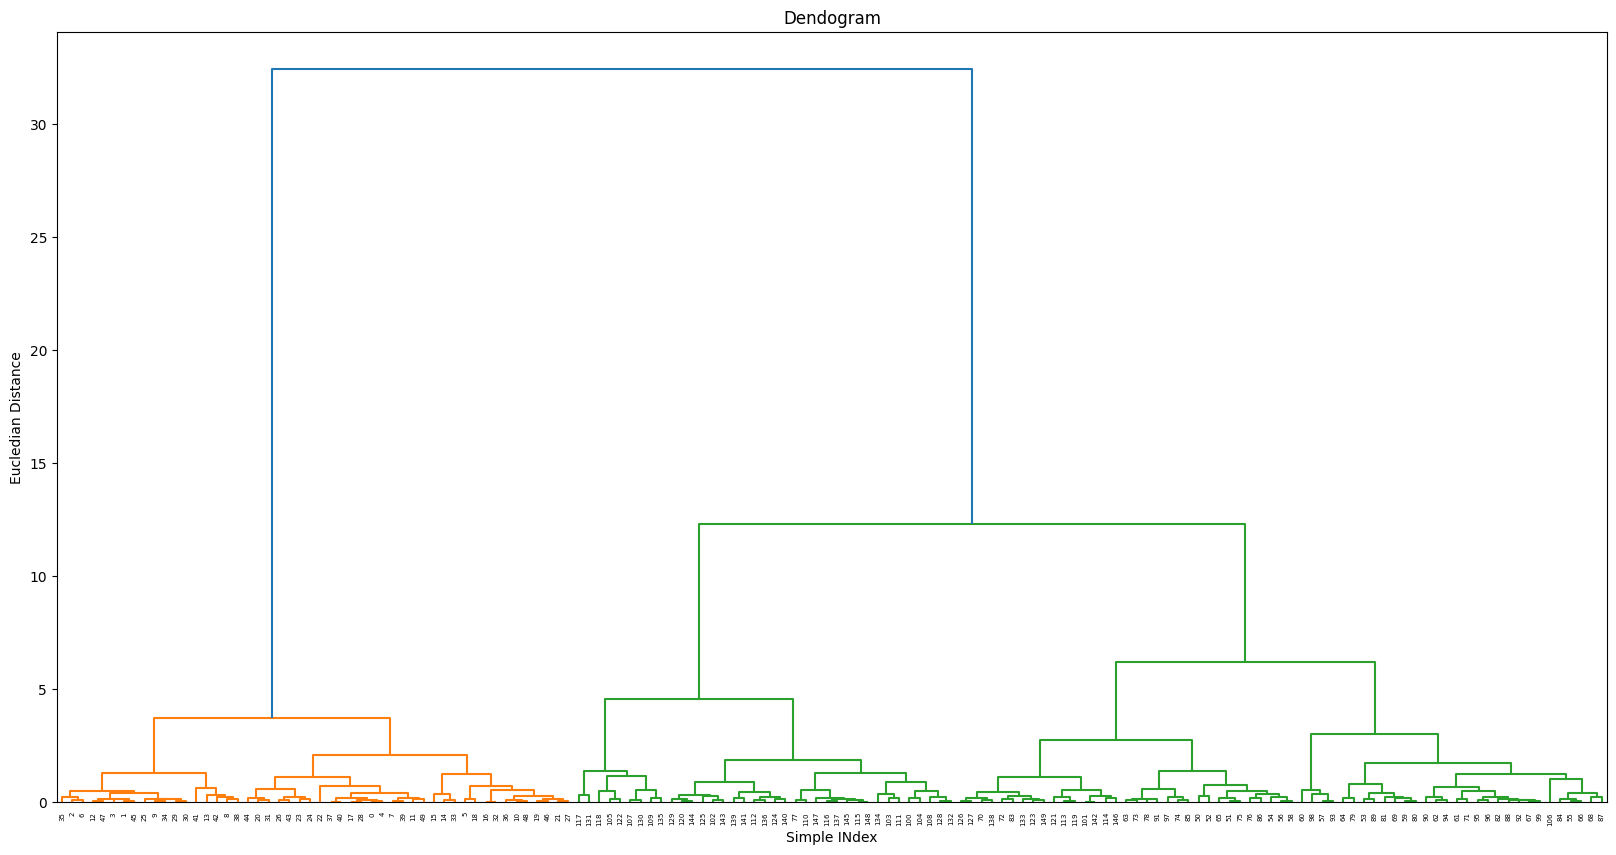

In [26]:
## Agglomerative Clustring
## To conatruct the dendogram 
import scipy.cluster.hierarchy as sc
# plot the dendogram 
plt.figure(figsize=(20,10))
plt.title("Dendograms")

## Create dendogram 
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title("Dendogram")
plt.xlabel("Simple INdex")
plt.ylabel("Eucledian Distance")

In [30]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [31]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
from sklearn.metrics import silhouette_score

In [33]:
silhouette_coefficient = []
# notice you start at two cluster for sillhoutee coefficient 
for k in range(2,11): 
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(pca_scaled)
    score = silhouette_score(pca_scaled, agglo.labels_)
    silhouette_coefficient.append(score)

In [34]:
silhouette_coefficient

[np.float64(0.7112353733237211),
 np.float64(0.5984750353705445),
 np.float64(0.5409772344736492),
 np.float64(0.5487843719847739),
 np.float64(0.4327647349472006),
 np.float64(0.43360988520012256),
 np.float64(0.4332936590632021),
 np.float64(0.40195356663071885),
 np.float64(0.3770470247230127)]

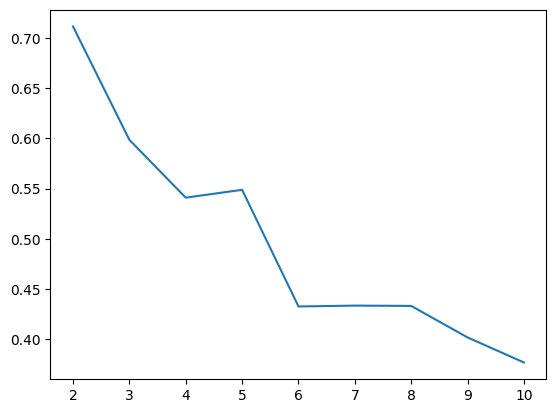

In [35]:
## plot the silhoutee score 
plt.plot(range(2,11),silhouette_coefficient)